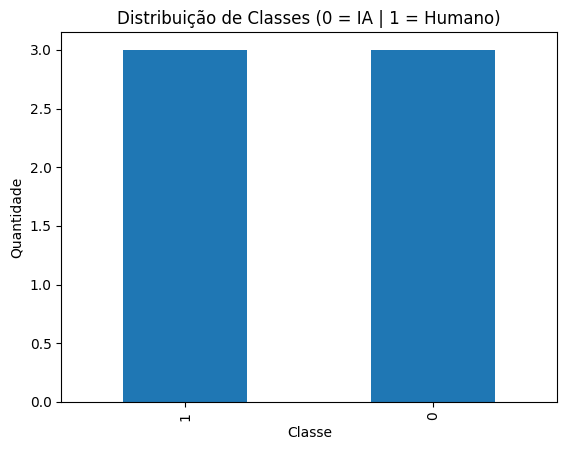

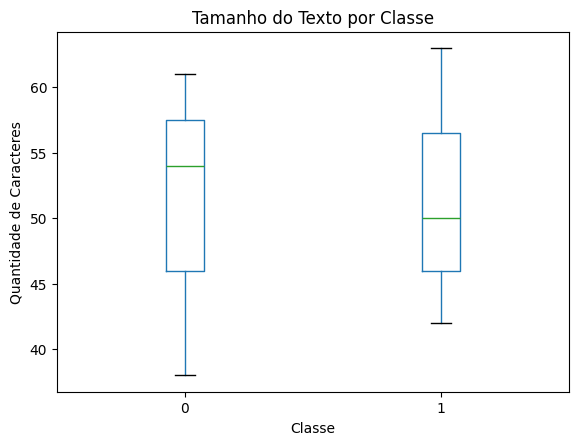

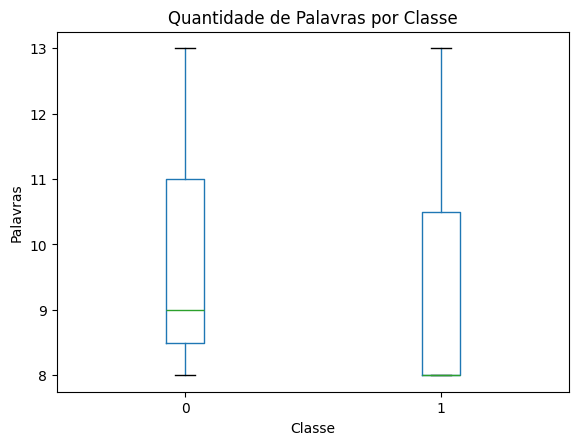

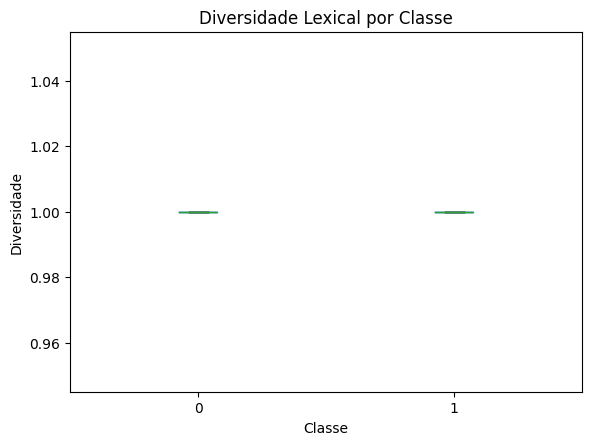

3    Texto gerado por IA que tende a ser mais diret...
4               Outro texto de IA com padrão gerativo.
5    Resposta automática criada por um modelo de li...
Name: texto, dtype: object

In [10]:
import sys
from pathlib import Path

# garantir que o diretório do projeto esteja no sys.path
sys.path.append(str(Path().resolve().parent))

from src.eda_texto import AnaliseExploratoriaTexto

root = Path().resolve()
dataset_path = None
for _ in range(6):
    candidate = root / "data" / "processed" / "dataset.csv"
    if candidate.exists():
        dataset_path = candidate
        break
    root = root.parent
if dataset_path is None:
    raise FileNotFoundError("Arquivo 'data/processed/dataset.csv' não encontrado nos diretórios ancestrais")
try:
    # verifica se o arquivo existe e não está vazio
    if not dataset_path.exists() or dataset_path.stat().st_size == 0:
        raise ValueError(f"Arquivo CSV inexistente ou vazio: {dataset_path}")

    # verifica se há pelo menos uma linha com conteúdo (header ou dados)
    with dataset_path.open("r", encoding="utf-8") as f:
        for line in f:
            if line.strip():
                header_line = line.strip()
                break
        else:
            raise ValueError(f"Arquivo CSV sem conteúdo legível: {dataset_path}")

    # tentativa de instanciar a classe; captura erros para fornecer diagnóstico claro
    try:
        eda = AnaliseExploratoriaTexto(str(dataset_path))
    except Exception as e:
        raise RuntimeError(f"Falha ao ler '{dataset_path}' com AnaliseExploratoriaTexto: {e}") from e

except Exception as e:
    # relança para interromper a execução do notebook com mensagem clara
    raise

eda.plot_distribuicao_labels()
eda.plot_tamanho_texto()
eda.plot_quantidade_palavras()
eda.plot_diversidade_lexical()

eda.resumo_estatistico()
eda.comparar_medias()

eda.palavras_mais_frequentes(label=1)  # Humanos
eda.palavras_mais_frequentes(label=0)  # IA

eda.amostras_texto(label=1)
eda.amostras_texto(label=0)
